In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
BasePath = "data/Example/"

In [7]:
Files = os.listdir(BasePath)
print(Files)
TestFile = os.listdir(BasePath + Files[1])
print(TestFile)

['essay (during learning)', 'knowledge test (posttest)', 'knowledge test (pretest)', 'metacognitive knowledge test (pretest)', 'process labels (during learning)', 'transfer test (posttest)']
['Deel 4-Vragenlijst C -cijfers.csv']


In [9]:
def clean_data(X, extra_columns = []):
    print(X.head())
    X.drop(X[X['Status'] != 'Beëindigd'].index, inplace = True)
    # Add Gebruikte tijd later again.
    cols = ['E-mailadres', 'Voornaam', 'Achternaam', 'Status', 'Gestart op', 'Voltooid', 'Gebruikte tijd']

    if extra_columns:
        for i in extra_columns:
            cols.append(i)

    X.drop(columns= cols, inplace = True)
    # I hate everything about this line
    X = X.replace(',','.', regex=True).replace('-', '0', regex=True).astype(float).astype(int)
    return X

def group_y(Y, total_options_of_y):
    val = int(total_options_of_y/3)
    print(len(Y))
    print(type(Y))
    for i, y in Y.items():
        if y <= val :
            Y[i] = 0
        elif y >= val and y <= (val*2):
            Y[i] = 1
        elif y >= (val*2):
            Y[i] = 2
    return Y

In [10]:
def split_data(x_data, y_data, test_size):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size)
    return X_train, X_test, y_train, y_test

def getXY(dataset, exclude):
    X = dataset.drop([exclude], axis=1)
    Y = dataset[exclude]

    return X, Y

def get_accuracy(Model, X, Y):
    predict_list = Model.predict(X)

    accuracy = accuracy_score(Y, predict_list)

    return accuracy, predict_list

In [14]:
Test = pd.read_csv(BasePath + Files[1] + "/" + TestFile[0])
print(Test)

# Remove all the nasty data
CleanTest = clean_data(Test)
CleanTest.head(n=2)

# Obtain X and Y to test effectiveness later
#X, y = getXY(CleanTest, "Cijfer/26,00")

# print(len(y))
# print(len(X))

#Y = group_y(y, 27)

# print(Y)
# print(len(Y))

# Obtain train Test data
# X_train, X_test, y_train, y_test = split_data(X, Y, 0.2)

             Achternaam Voornaam             E-mailadres     Status  \
0                    GE  fsp4232   fsp4232@localhost.com  Beëindigd   
1                    GE  fsp4230   fsp4230@localhost.com  Beëindigd   
2                    GE  fsp4228   fsp4228@localhost.com  Beëindigd   
3                    GE  fsp4227   fsp4227@localhost.com      Bezig   
4                    GE  fsp4226   fsp4226@localhost.com  Beëindigd   
5                    GE  fsp4223   fsp4223@localhost.com  Beëindigd   
6                    GE  fsp4222   fsp4222@localhost.com  Beëindigd   
7                    GE  fsp4221   fsp4221@localhost.com  Beëindigd   
8                    GE  fsp4220   fsp4220@localhost.com  Beëindigd   
9                    GE  fsp4219   fsp4219@localhost.com  Beëindigd   
10                   GE  fsp4217   fsp4217@localhost.com  Beëindigd   
11                   GE  fsp4216   fsp4216@localhost.com  Beëindigd   
12                   GE  fsp4215   fsp4215@localhost.com  Beëindigd   
13    

,"Cijfer/30,00","V. 1 /1,00","V. 2 /1,00","V. 3 /1,00","V. 4 /1,00","V. 5 /1,00","V. 6 /1,00","V. 7 /1,00","V. 8 /1,00","V. 9 /1,00",...,"V. 21 /1,00","V. 22 /1,00","V. 23 /1,00","V. 24 /1,00","V. 25 /1,00","V. 26 /1,00","V. 27 /1,00","V. 28 /1,00","V. 29 /1,00","V. 30 /1,00"
0,23,1,1,0,1,0,0,1,1,1,...,1,1,1,1,0,1,1,0,1,1
1,26,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [15]:
# gm = GaussianMixture(n_components=3, random_state=0).fit(X)
#
# acc, predict = get_accuracy(gm, X, Y)
# print(acc)

NameError: name 'X' is not defined

## Some Random plotting tests

In [16]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
#
# #Load Data
# pca = PCA(2)
#
# #Initialize the class object
# kmeans = KMeans(n_clusters= 3)
#
# #predict the labels of clusters.
# label = kmeans.fit_predict(X)
#
# #Transform the data
# df = pca.fit_transform(X)
#
#
# #Getting unique labels
# u_labels = np.unique(label)
#
# #plotting the results:
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()
#
# # kmeans = KMeans(n_clusters=27, random_state=0).fit(X)
#
# # acc = get_accuracy(gm, X_test, y_test)

NameError: name 'X' is not defined

## Lucas' Code time for fun and goodness (and maybe clustering based on specific features not from the test scores)

### using exclusively the ctrl+c and ctrl+v keys

In [17]:
# Now that we can cluster students based on the features extracted from the process lables (kind of they all seem to be in the -1 class?)
# We can now combine these features with the features extracted by Ylja and link them based on username

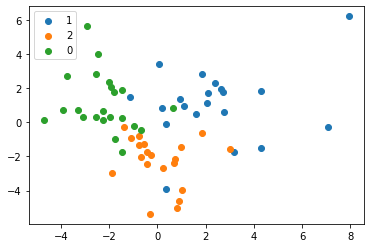

In [66]:
from sklearn.cluster import DBSCAN
import csv
from datetime import datetime
# which features will we use? lets set out some cognition features
# the two different goodness values can be knowledge gained or score in post-test
# lets first take in the process labesl

def fix(X):
    # making sure the users arent clustered on username
    try:
        X = X.drop(columns = ["Username"])
    except:
        pass
    X = (X-X.mean())/X.std()
    # filling the nan values
    X = X.fillna(0)
    return X

def load_process_features(c_file):

    # in study 3 there are two different studies (??) based on if its:
    # fsp3_2xx.patterns :  Username	Moodle ID	Session Start (ms)	Process Label	Process Start Time	Process End Time

    # fsg3_0xx.combined : logid	actionid	patternid	time	log label	action label	pattern label	pattern span	log value

    # fsc3_0xx.combined : logid	actionid	patternid	time	log label	action label	pattern label	pattern span	log value

    # i will just use the bottom two because they are the same and can just regex combined

    features = {}

    cleaned = []
    with open(BasePath_2 + c_file, newline='', encoding='utf8') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            real = (', '.join(row))
            if real.count(",") == 9:
                cleaned.append(np.array(real.split(",")))
    cleaned = np.array(cleaned)
    data = pd.DataFrame(cleaned, columns = ["logid", "actionid", "patternid", "date", "time",	"log_label", "action_label", "pattern_label", "pattern_span", "log_value"])

    features["Username"] = c_file.split(",")[0]
    # creating the time spent column

    time = list(data["time"])
    time.insert(0, time[0])
    time_spent = []
    FMT = ' %H:%M:%S'
    for i in range(1,len(time)):
        tdelta = datetime.strptime(time[i], FMT) - datetime.strptime(time[i-1], FMT)
        time_spent.append(tdelta.total_seconds())

    data["Process_Time_Spent"] = time_spent
    proc_labels = np.unique(np.array(data["pattern_label"]))


    max_time = data["Process_Time_Spent"].sum()

    for proc in proc_labels:
        proc_rows = data[data["pattern_label"] == proc]

        # feature #1 total time spent on processes
        features[("Time_spent_"+proc)] = [proc_rows["Process_Time_Spent"].sum()]

        # feature #2 mean time per session process session
        features[("Mean_time_"+proc)] = [proc_rows["Process_Time_Spent"].mean()]

        # feature #3 amount of times they did a process
        features[("Times_performed_"+proc)] = [proc_rows["Process_Time_Spent"].count()]

        # feature #4 percentage of time spent on a process
        features[("Percent_time_"+proc)] = [proc_rows["Process_Time_Spent"].sum()/max_time]

    # return the features as a df
    return pd.DataFrame.from_dict(features)

def cluster(X, features):
    X = fix(X)
    # creating labels for the users

    # clustering = DBSCAN(eps=10.5, min_samples=2).fit(X)
    # return clustering.labels_

    kmeans = KMeans(n_clusters= 3)
    clustering = kmeans.fit_predict(X)

    return clustering

def create_X(user_df, labels):

    X = fix(user_df)

    labels = pd.DataFrame(labels)

    # selecting only the features the users chose
    # X = user_df[features_chosen]

    #Load Data into pca
    pca = PCA(2)

    #Transform the data into 2 dimensions
    X = pca.fit_transform(X)
    X = pd.DataFrame(X)

    result = pd.concat([X, labels], axis=1)

    result.columns = ['X', 'y', 'labels']

    return result

def plot(X):
    u_labels = X['labels'].unique()

    for i in u_labels:
        plt.scatter(X['X'].loc[X['labels'] == i],
                    X['y'].loc[X['labels'] == i],
                    label = i)
    plt.legend()
    plt.show()


# ==================== main
BasePath_2 = "data/Flora Data/Study 3/"
Files = os.listdir(BasePath_2)

# getting the combined files
combined_files = []
for x in Files:
    if "combined.csv" in x:
        combined_files.append(x)

users = []
for c_file in combined_files:
    users.append(load_process_features(c_file))

user_df = pd.concat(users)
features_chosen = list(user_df.columns)
labels = cluster(user_df, features_chosen)
X = create_X(user_df, labels)
plot(X)

In [72]:
X

,X,y,labels
0,7.088102,-0.279411,1
1,4.306883,-1.497738,1
2,-0.692535,-2.025155,2
3,0.807719,-4.993237,2
4,2.781382,0.601372,1
...,...,...,...
57,-3.929152,0.702156,0
58,-1.479401,0.259472,0
59,-0.770992,-1.357102,2
60,0.982126,-1.477146,2


In [83]:
d = (X.groupby('labels')
     .apply(lambda x: dict(zip(x['X'],x['y'])))
     .to_dict())

In [84]:
d

{0: {-1.4483228628850318: 1.8741406706550334,
  -2.544701158840132: 2.829622458880808,
  -2.015628172136808: 2.3599758649369393,
  0.6597248763198464: 0.8629073030142298,
  -2.8995742510338007: 5.61917976596224,
  -2.470099862683326: 4.008880898063699,
  -3.736688934363438: 2.7267609789545917,
  -1.9446858919259773: 0.3136544550761121,
  -3.0941293261724083: 0.2904645204335426,
  -0.6939187555006094: -0.48108470251809127,
  -2.5542346300424064: 0.3035549677920658,
  -0.9632844371970762: -0.21660108469479555,
  -1.758205696081158: -0.9573703514145059,
  -1.7989420776332554: 1.7802607014074656,
  -4.6961177464749895: 0.13193444359093406,
  -1.4496615024763937: -1.763063152251099,
  -2.2393849220650215: 0.6682217242122178,
  -2.2495808110099373: 0.11587134064258073,
  -1.934217306177391: 2.038500438942514,
  -3.9291518359628785: 0.702155918593691,
  -1.4794009041965972: 0.25947154193431277,
  -3.275409506384119: 0.7407123763312561},
 1: {7.088101826788613: -0.27941057397141483,
  4.306882

In [80]:
import json
with open('api/result.json', 'w') as fp:
    json.dump(d, fp)